b__0 = 1.416666666666667
b_1 = 0.9166666666666666


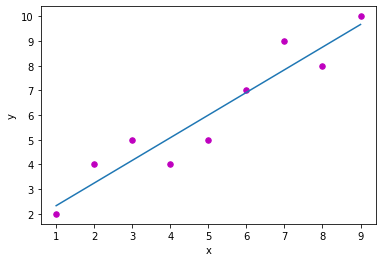

In [23]:
import numpy as np
import matplotlib.pyplot as plt 



def estimated_coefficient(x, y):
    
    n =np.size(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    SS_xy = np.sum(y*x) - n* x_mean * y_mean 
    SS_xx = np.sum(x*x) - n* x_mean * x_mean
    
    b_1 = SS_xy/ SS_xx
    
    b_0 = y_mean - b_1 * x_mean
    
    return (b_0, b_1)

def plot_regression_line(x,y, b):
    y_predict = b[0]+b[1]*x
   # print(y_predict)
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
    plt.plot(x, y_predict)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    
    

def main():
    x = np.array([1,2,3,4,5,6,7,8,9])
    y = np.array([2,4,5,4,5,7,9,8, 10])
    
    b = estimated_coefficient(x,y)
    
    print("b__0 = {}\nb_1 = {}".format(b[0], b[1]))
    
    
    plot_regression_line(x, y, b) 
    

    

if __name__ == "__main__": 
    main() 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Regression_line:
    def __init__(self, X, Y):
        
            self.X = X
            self.Y = Y
            self.b = [0,0]
    
    def update_coeffs(self, learning_rate): 
        Y_pred = self.predict() 
        Y = self.Y 
        m = len(Y) 
        self.b[0] = self.b[0] - (learning_rate * ((1/m) * 
                                  np.sum(Y_pred - Y))) 
  
        self.b[1] = self.b[1] - (learning_rate * ((1/m) * 
                                  np.sum((Y_pred - Y) * self.X))) 
  
    
    def predict(self, X=[]): 
        Y_pred = np.array([]) 
        if not X: X = self.X 
        b = self.b 
        for x in X: 
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x)) 
  
        return Y_pred 

         
    def get_current_accuracy(self, Y_pred): 
        p, e = Y_pred, self.Y 
        n = len(Y_pred) 
        return 1-sum( 
            [ 
                abs(p[i]-e[i])/e[i] 
                for i in range(n) 
                if e[i] != 0] 
        )/n 
    #def predict(self, b, yi): 
  
    def compute_cost(self, Y_pred): 
        m = len(self.Y) 
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2) 
        return J 
  
    def plot_best_fit(self, Y_pred, fig): 
                f = plt.figure(fig) 
                plt.scatter(self.X, self.Y, color='b') 
                plt.plot(self.X, Y_pred, color='g') 
                f.show() 
  
   
  

def main():
    x = np.array([2,6, 5,7])
    y = np.array([3, 10, 4, 3])
    
  
    
    regressor = Regression_line(x, y)
    
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = [] 

    Y_pred = regressor.predict() 
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line') 
    while 1: 
        Y_pred = regressor.predict() 
        #print('prediction = ',Y_pred)
        cost = regressor.compute_cost(Y_pred) 
        costs.append(cost) 
        #print('cost = ', costs)

        regressor.update_coeffs(learning_rate) 
        
          
        iterations += 1
        if iterations % steps == 0: 
            print(iterations, "epochs elapsed") 
            print("Current accuracy is :",  
                   regressor.get_current_accuracy(Y_pred)) 
            regressor.plot_best_fit(Y_pred, 'Final Best Fit Line') 
  
  
            stop = input("Do you want to stop (y/*)??") 
            if stop == "y": 
                break
  
    #final best-fit line 
    
    #plot to verify cost fuction decreases 
    h = plt.figure('Verification') 
    plt.plot(range(iterations), costs, color='r') 
    h.show() 
  
    # if user wants to predict using the regressor: 
    regressor.predict([i for i in range(10)]) 
